## Филиппова А. Д. НПМбд-01-20

In [23]:
from PIL import Image
import numpy as n

Если библиотека PIL не импортируется, установите её с помощью команды ниже и перезапустите блокнот.

In [10]:
!pip install Pillow
# либо для одного текущего пользователя:
!pip install --user Pillow

Загрузите картинку с помощью команды open. Если необходимо, можете изменить размер картинки с помощью метода resize.

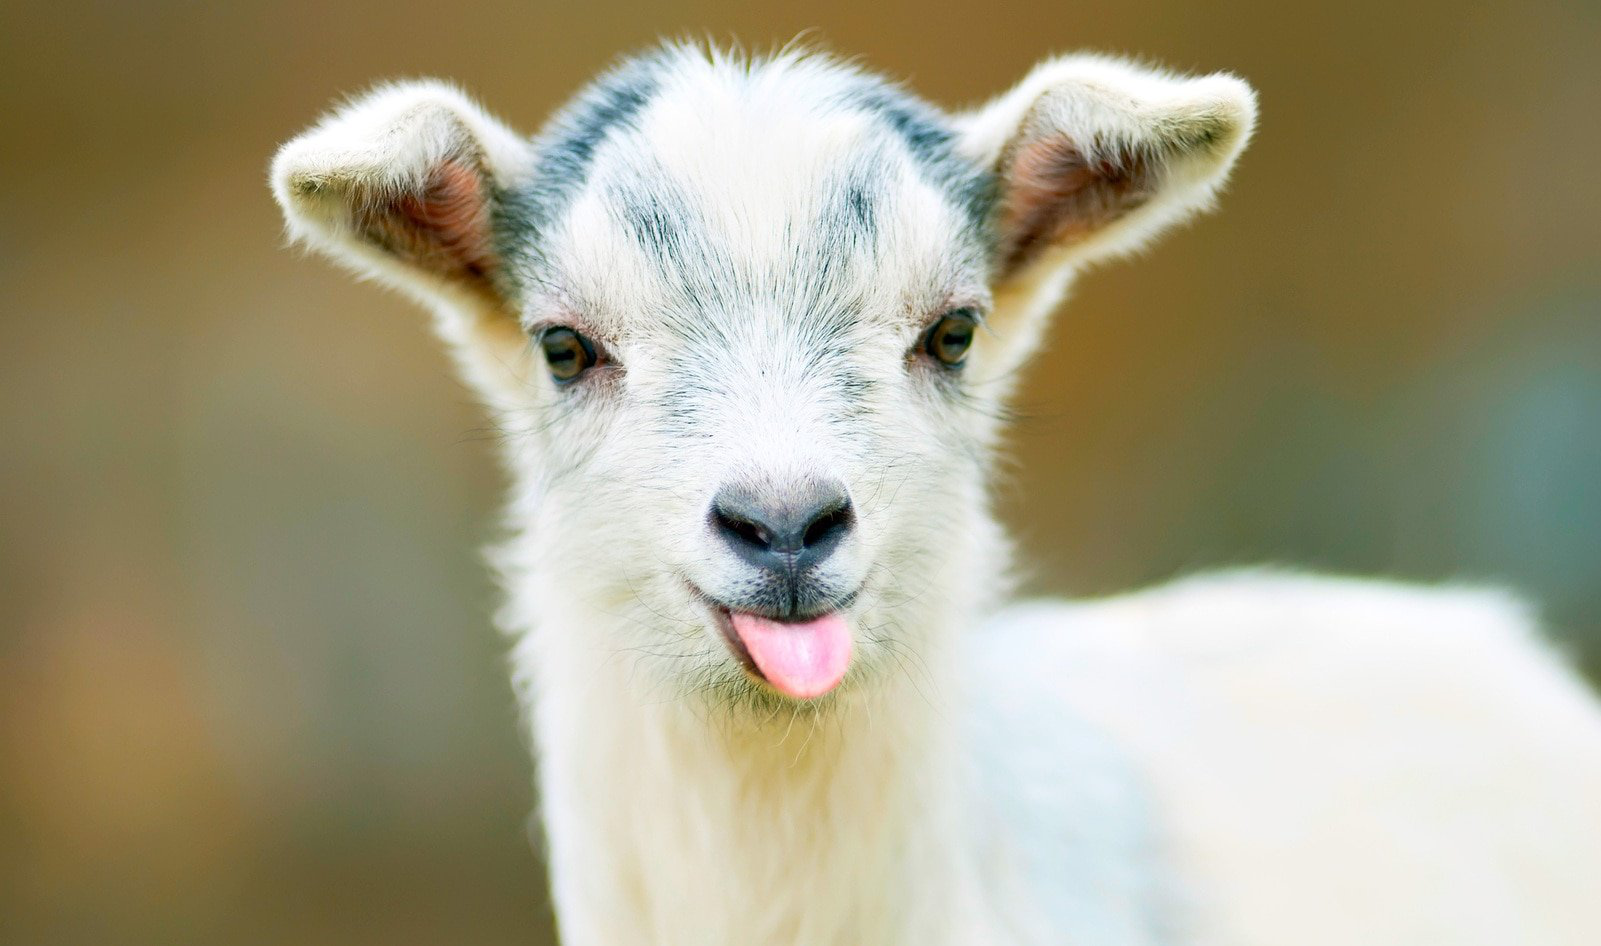

In [11]:
img = Image.open('козлик.jpeg')#.resize(())
img

Преобразуйте картинку из объекта класса PIL в Numpy массив.

In [12]:
x = np.array(img, dtype=np.float32)
x.dtype

dtype('float32')

In [13]:
x.shape

(946, 1601, 3)

Видно, что исходная цветная картинка содержит три канала - RGB. Преобразуем её в одноканальную либо с помощью специальной функции rgb2gray либо обычным усреднением по трём каналам.

In [14]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

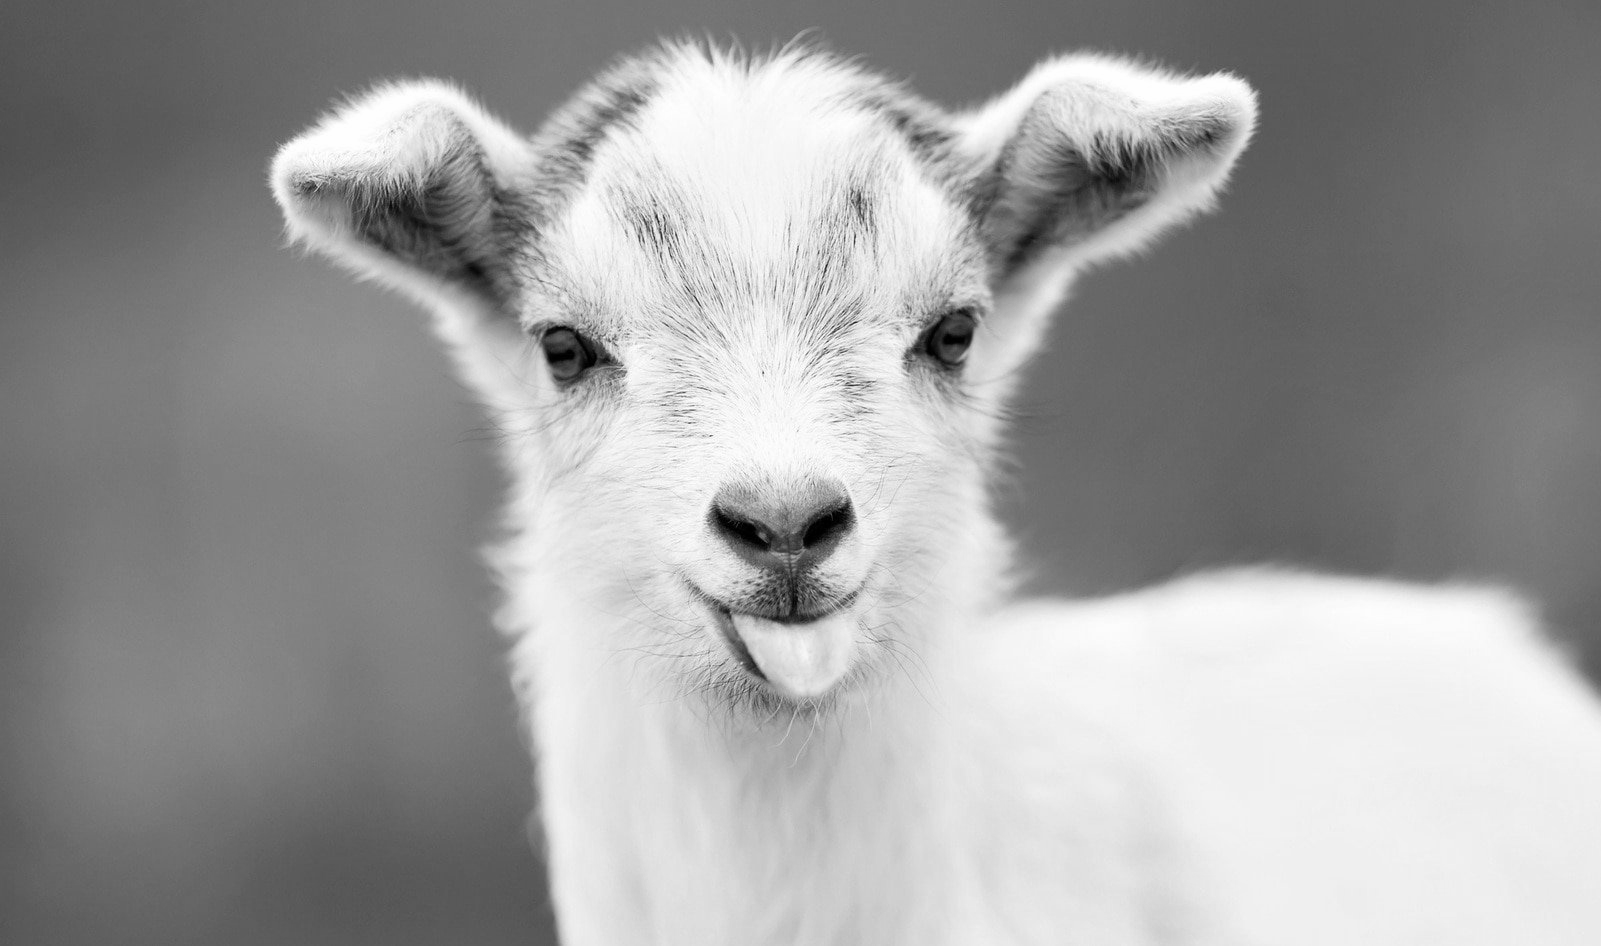

In [15]:
Image.fromarray(np.asarray(rgb2gray(x), dtype=np.uint8))

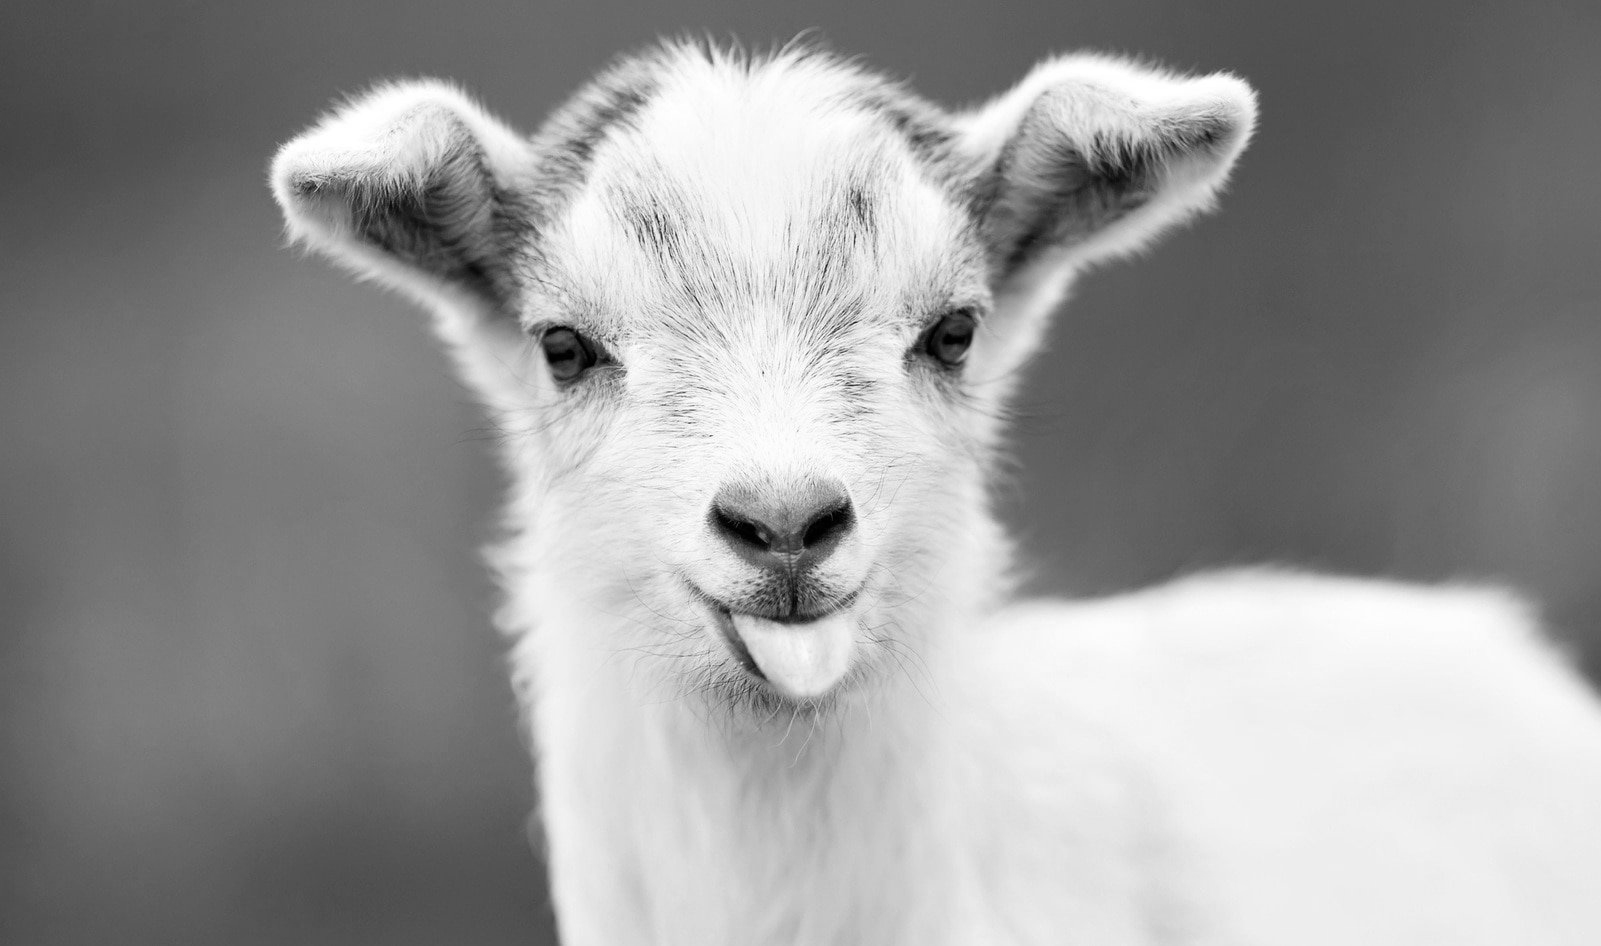

In [16]:
Image.fromarray(np.asarray(x.mean(axis=2), dtype=np.uint8))

Дальше будем работать с одноканальной картинкой, т.е. двумерной матрицей.

In [17]:
#y = rgb2gray(x)
y = x.mean(axis=2)
y

array([[ 79.      ,  77.      ,  77.      , ...,  93.      ,  93.      ,
         91.666664],
       [ 80.      ,  77.      ,  76.      , ...,  92.      ,  93.      ,
         92.      ],
       [ 80.      ,  77.      ,  75.      , ...,  92.      ,  92.      ,
         92.      ],
       ...,
       [ 80.666664,  79.666664,  78.666664, ..., 233.      , 233.      ,
        233.33333 ],
       [ 78.333336,  77.333336,  77.333336, ..., 233.      , 233.      ,
        233.33333 ],
       [ 78.333336,  77.333336,  77.333336, ..., 233.      , 233.      ,
        233.33333 ]], dtype=float32)

In [18]:
y.shape

(946, 1601)

Сделаем SVD разложение

In [19]:
U, S, V = np.linalg.svd(y, full_matrices=False)

In [20]:
U.shape

(946, 946)

In [21]:
V.shape

(946, 1601)

Проверим что разложение корректное, соберём его обратно, перемножив матрицы

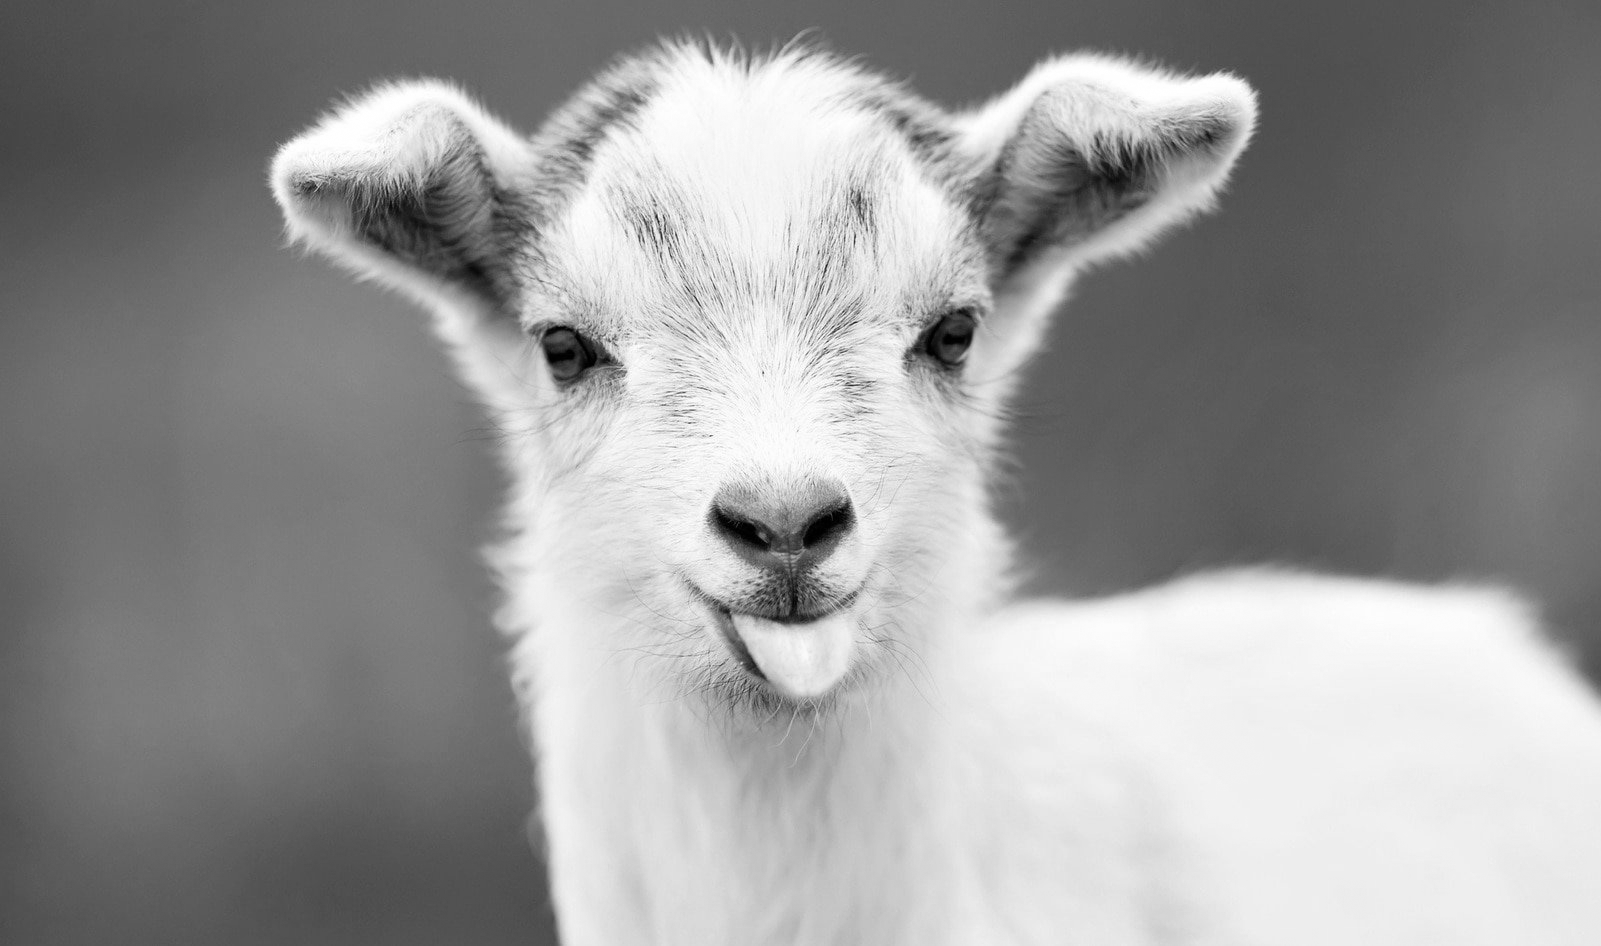

In [22]:
Y_full = U.dot(np.diag(S)).dot(V)
Image.fromarray(np.asarray(Y_full, dtype=np.uint8))

PIL объект можно при необходимости сохранить в файл на диск

In [24]:
Image.fromarray(np.asarray(Y_full, dtype=np.uint8)).save(f'full_rank.png')

**Задание для самостоятельной работы:**  
1. Рассмотреть малоранговые разложения
2. Получить картинки для разного значения ранга
3. Сохранить несколько картинок на диск
4. Сделать выводы

**Подсказки:**  
Не забудьте при преобразовании Numpy массива в объект PIL преобразовывать тип элементов в np.uint8.  
Если число находится вне диапазона [0, 255], сделайте клиппирование - все числа больше 255 приравняйте числу 255, все отрицательные числа сделайте равными нулю.

In [26]:
r, g, b = x[:,:,0], x[:,:,1], x[:,:,2]
U_r, S_r, V_r = np.linalg.svd(r, full_matrices=False)
U_g, S_g, V_g = np.linalg.svd(g, full_matrices=False)
U_b, S_b, V_b = np.linalg.svd(b, full_matrices=False)

rang = [1, 5, 10, 25, 50, 100, 150]

for r in rang: 
    Y_R = U_r[:,:r].dot(np.diag(S_r[:r])).dot(V_r[:r,:]) 
    Y_R[Y_R > 255] = 255 
    Y_R[Y_R < 0] = 0 

    Y_G = U_g[:,:r].dot(np.diag(S_g[:r])).dot(V_g[:r,:]) 
    Y_G[Y_G > 255] = 255 
    Y_G[Y_G < 0] = 0 

    Y_B = U_b[:,:r].dot(np.diag(S_b[:r])).dot(V_b[:r,:]) 
    Y_B[Y_B > 255] = 255 
    Y_B[Y_B < 0] = 0 
    
    Y = np.dstack((Y_R, Y_G, Y_B)) 
    Image.fromarray(np.asarray(Y, dtype=np.uint8)).save(f'козлик.rang={r}.png')

## При увеличении ранга изображение становится более четкой, при малых рангах изображение расплывчатое.